# Grishma Gosain Assignment 2
169057244 - Cp321 Section B

In [193]:
#%pip install pandas

In [194]:
import pandas as pd
print(pd.__version__)

2.3.3


In [195]:
df=pd.read_csv(r"C:\Users\chill\Downloads\CO2_Emissions_Sample.csv") 
df.head()

,Country,Continent,Year,CO2_Emissions,Methane_Emissions,Nitrous_Emissions,GDP,Population
0,Canada,North America,2000,7750.862683,1053.030592,371.225407,734.472170,3.510898e+07
1,Canada,North America,2001,7955.423607,1023.118633,199.876401,17204.341086,7.396990e+07
2,Canada,North America,2002,8690.632912,994.091186,459.825424,37012.640134,1.296462e+07
3,Canada,North America,2003,NaN,489.361214,460.923247,29251.111335,2.075688e+07
4,Canada,North America,2004,7324.463432,1077.207390,408.154588,23575.082668,1.239332e+07


In [196]:
#Cleaning data 
num_cols = ["CO2_Emissions", "Methane_Emissions", "Nitrous_Emissions", "GDP", "Population"]
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

import matplotlib.pyplot as plt

# Part A
Visualizing Data

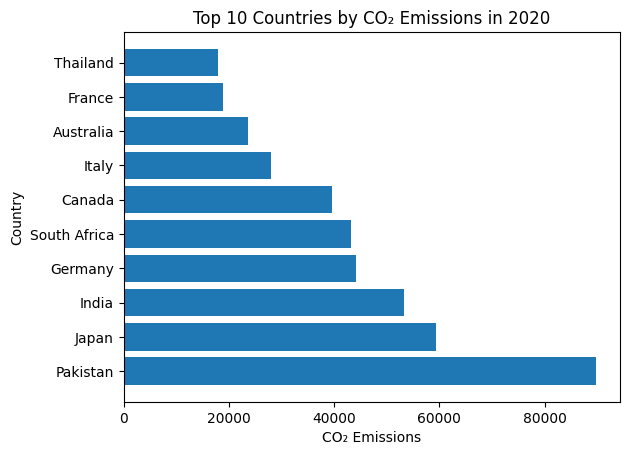

In [197]:
# A.1) Bar Chart showing the top 10 countries by C02 emissions in 2020
df2020 = df[df["Year"] == 2020]
top10 = df2020.sort_values("CO2_Emissions", ascending=False).head(10)

plt.figure()
plt.barh(top10["Country"], top10["CO2_Emissions"])

#Titles
plt.title("Top 10 Countries by CO₂ Emissions in 2020")
plt.xlabel("CO₂ Emissions")
plt.ylabel("Country")

plt.show()

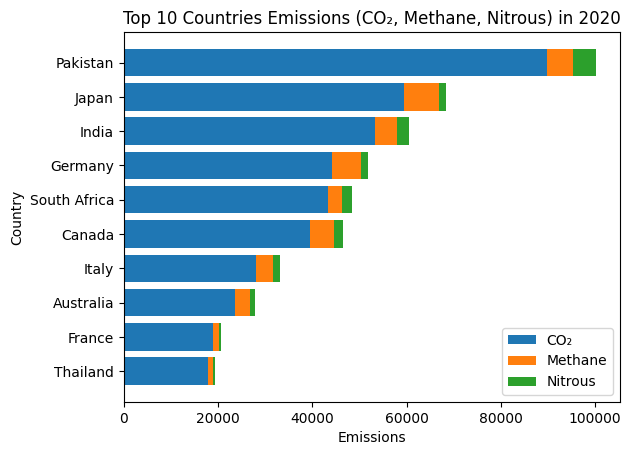

In [198]:
# A.2) Stacked bar graph showing C02, Methane, & Nitrous emissions for the same countries (top 10)
top10 = top10.sort_values("CO2_Emissions")
plt.figure()
plt.barh(top10["Country"], top10["CO2_Emissions"], label="CO₂")

#Stack 1
plt.barh(
    top10["Country"],
    top10["Methane_Emissions"],
    left=top10["CO2_Emissions"],
    label="Methane"
)

#Stack 2
plt.barh(
    top10["Country"],
    top10["Nitrous_Emissions"],
    left=top10["CO2_Emissions"] + top10["Methane_Emissions"],
    label="Nitrous"
)

plt.title("Top 10 Countries Emissions (CO₂, Methane, Nitrous) in 2020")
plt.xlabel("Emissions")
plt.ylabel("Country")
plt.legend()
plt.show()

# Part B
Visualizing Associations

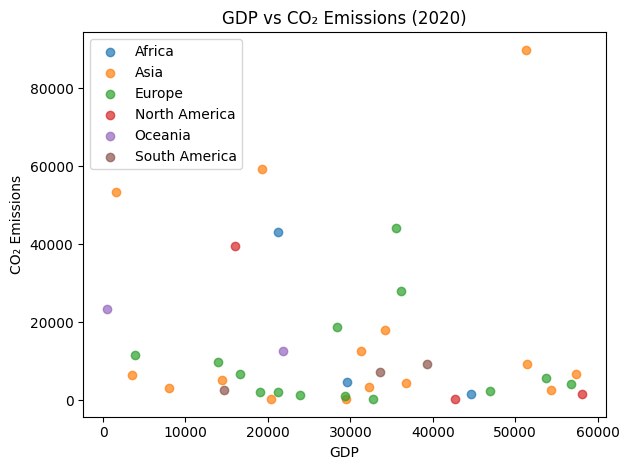

In [200]:
#B.1 Scatter plot - GDP vs. C02 emissions
plt.figure()

for continent, group in df2020.groupby("Continent"):
    plt.scatter(
        group["GDP"],
        group["CO2_Emissions"],
        label=continent,
        alpha=0.7
    )

plt.title("GDP vs CO₂ Emissions (2020)")
plt.xlabel("GDP")
plt.ylabel("CO₂ Emissions")
plt.legend()
plt.tight_layout()
plt.show()

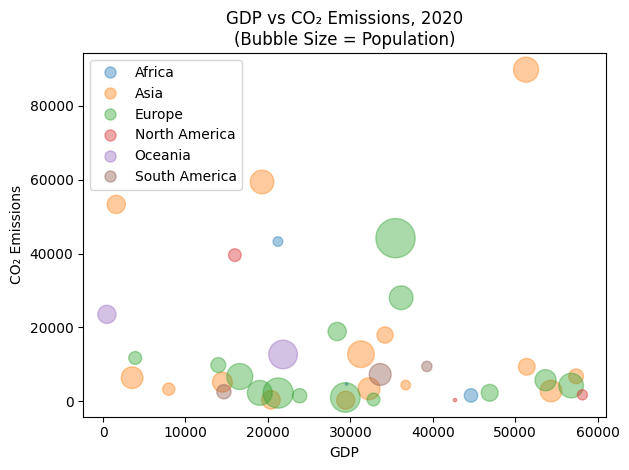

In [201]:
#B.2 Bubble plot - GDP vs. C02 emissions
sizes = df2020["Population"] / df2020["Population"].max() * 700
plt.figure()

handles = []
labels = []

for continent, group in df2020.groupby("Continent"):
    s = group["Population"] / df2020["Population"].max() * 800
    
    sc = plt.scatter(
        group["GDP"],
        group["CO2_Emissions"],
        s=s,
        alpha=0.4
    )
    
    handles.append(plt.Line2D([0], [0], marker='o', linestyle='',markersize=8, color=sc.get_facecolor()[0]))
    labels.append(continent)

plt.title("GDP vs CO₂ Emissions, 2020\n(Bubble Size = Population)")
plt.xlabel("GDP")
plt.ylabel("CO₂ Emissions")
plt.legend(handles, labels)
plt.tight_layout()
plt.show()

In [202]:
#B.3 Correlogram: correlation matrix  (C02, GDP, Methane, Nitrous)

In [203]:
#The column values
cols = ["CO2_Emissions", "GDP", "Methane_Emissions", "Nitrous_Emissions"]
corr = df2020[cols].corr()
#I choose 2020 as a year to be able to see different visulizations of the same dataset throughout this ast!
corr

,CO2_Emissions,GDP,Methane_Emissions,Nitrous_Emissions
CO2_Emissions,1.000000,-0.103533,0.917970,0.957337
GDP,-0.103533,1.000000,-0.180005,-0.044149
Methane_Emissions,0.917970,-0.180005,1.000000,0.808031
Nitrous_Emissions,0.957337,-0.044149,0.808031,1.000000


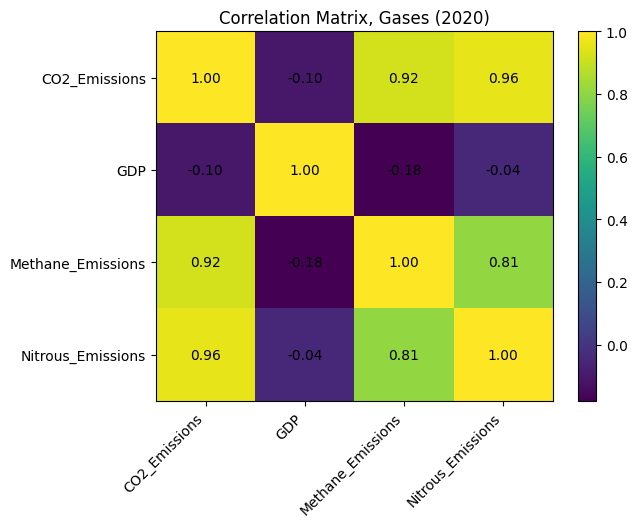

In [204]:
#DRAW
plt.figure()

plt.imshow(corr, aspect="auto")

plt.xticks(range(len(cols)), cols, rotation=45, ha="right")
plt.yticks(range(len(cols)), cols)

for i in range(len(cols)):
    for j in range(len(cols)):
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}",
                 ha="center", va="center")

plt.title("Correlation Matrix, Gases (2020)")
plt.colorbar()
plt.show()

**Patterns and Relationships**

**BUBBLE**
From the graph, the relation between Emissions and GDP doesn't exactly have a strong correlation, however some entities display trends. Such as the higher GDP countries tend to have higher C02 emissions, meanwhile mid-range GDP countries had mid-range emissions rate. Additionally, the countires with bigger populations (bigger bubbles), tend to have higher emission rates, however there were some countries with small populations with high emission rates, indicating a slight relation between population size and emissions, however the main factors will likely be something else. 

**MATRIX**
The matrix shows high postiive correlations between CO2 + Methane, C02 + Nitrous, and Methane + Nitrous. It also clearly showed how GDP has a weak relation with all the emission variables as they had negative correlation values. This means that GDP cannot predict emissions rate well, and another factor likely can predict it better.

# Part C
Visualizing Proportions

In [205]:
#C.1 - Stacked bar chart, proportion
cont_sum = df2020.groupby("Continent")[[
    "CO2_Emissions",
    "Methane_Emissions",
    "Nitrous_Emissions"
]].sum()

#proportions****
cont_prop = cont_sum.div(cont_sum.sum(axis=1), axis=0)
cont_prop

,CO2_Emissions,Methane_Emissions,Nitrous_Emissions
Continent,,,
Africa,0.893007,0.064630,0.042363
Asia,0.888014,0.076164,0.035822
Europe,0.868852,0.097770,0.033378
North America,0.851135,0.107094,0.041771
Oceania,0.860901,0.106476,0.032623
South America,0.863758,0.091499,0.044743


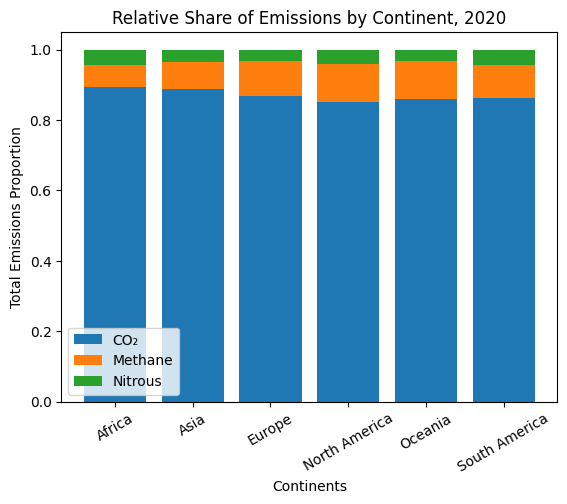

In [206]:
#DRAEING
plt.figure()

plt.bar(cont_prop.index, cont_prop["CO2_Emissions"], label="CO₂")
plt.bar(cont_prop.index,
        cont_prop["Methane_Emissions"],
        bottom=cont_prop["CO2_Emissions"],
        label="Methane")

plt.bar(cont_prop.index,
        cont_prop["Nitrous_Emissions"],
        bottom=cont_prop["CO2_Emissions"] + cont_prop["Methane_Emissions"],
        label="Nitrous")

plt.title("Relative Share of Emissions by Continent, 2020")
plt.xlabel("Continents")
plt.ylabel("Total Emissions Proportion")
plt.legend()
plt.xticks(rotation=30)
plt.show()


In [207]:
#C.2 - Treemap/piechart
#Calcualte total emissions/continent

cont_total = df2020.groupby("Continent")[[
    "CO2_Emissions",
    "Methane_Emissions",
    "Nitrous_Emissions"
]].sum()

# total greenhouse emissions per continent
cont_total["Total_Emissions"] = cont_total.sum(axis=1)
cont_total

,CO2_Emissions,Methane_Emissions,Nitrous_Emissions,Total_Emissions
Continent,,,,
Africa,49538.008715,3585.229262,2350.035870,55473.273848
Asia,275494.416058,23628.949961,11113.326581,310236.692601
Europe,139242.815215,15668.747706,5349.145937,160260.708858
North America,41670.791275,5243.228235,2045.053414,48959.072923
Oceania,36225.322189,4480.316193,1372.734534,42078.372916
South America,19303.530714,2044.852379,999.933786,22348.316879


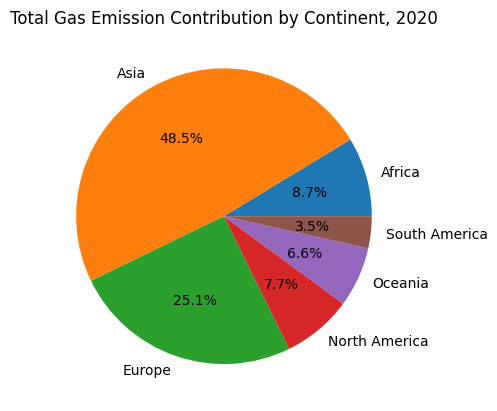

In [208]:
# PIE - CHART
import matplotlib.pyplot as plt

plt.figure()

plt.pie(
    cont_total["Total_Emissions"],
    labels=cont_total.index,
    autopct="%1.1f%%"
)

plt.title("Total Gas Emission Contribution by Continent, 2020")
plt.show()

# Part D
Visualizing Time Series

In [209]:
#D.1 - Line-chart

#I choose the top 5 most populated countries to see how population impacts emission rates
#Analyzed the same year 2020, to maimtain consistency across the assignment
df2020 = df[df["Year"] == 2020]
top5_pop = df2020.sort_values("Population", ascending=False).head(5)["Country"].tolist()
top5_pop


#Note: Data doesn't seem to reflect real-life values, such as population

['Germany', 'Greece', 'Switzerland', 'New Zealand', 'Philippines']

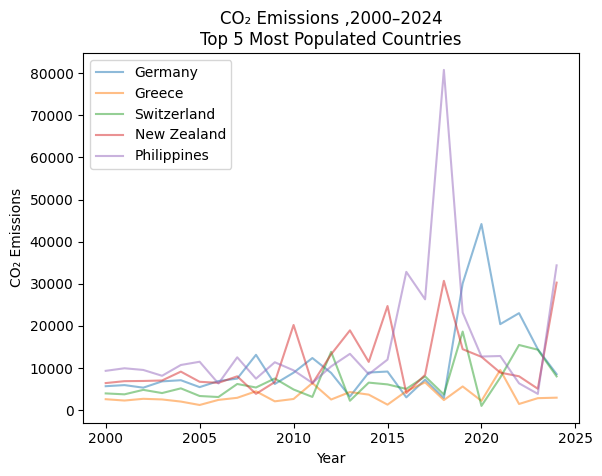

In [210]:
#Line chart w/o movung avg.
plt.figure()

for country in top5_pop:
    g = df[df["Country"] == country].sort_values("Year")
    
    plt.plot(
        g["Year"],
        g["CO2_Emissions"],
        label=country,
        alpha=0.5
    )

plt.title("CO₂ Emissions ,2000–2024\nTop 5 Most Populated Countries")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions")
plt.legend()
plt.show()

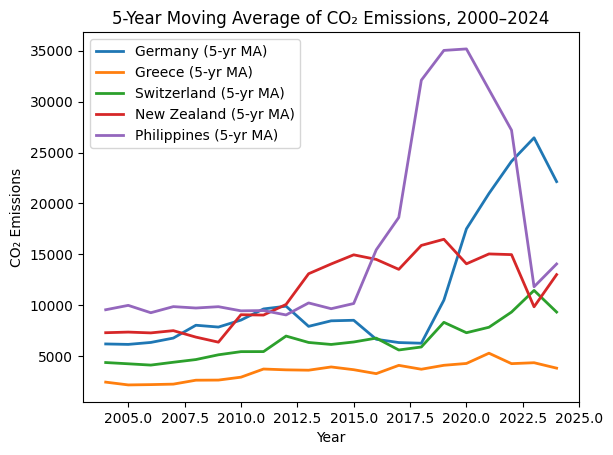

In [211]:
#MOVING AVERAGE - Split the two graphs apart so it's easier to see certain trends.
plt.figure()

for country in top5_pop:
    g = df[df["Country"] == country].sort_values("Year")
    
    # Moving average
    ma = g["CO2_Emissions"].rolling(window=5).mean()
    
    plt.plot(
        g["Year"],
        ma,
        linewidth=2,
        label=f"{country} (5-yr MA)"
    )

plt.title("5-Year Moving Average of CO₂ Emissions, 2000–2024")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions")
plt.legend()
plt.show()


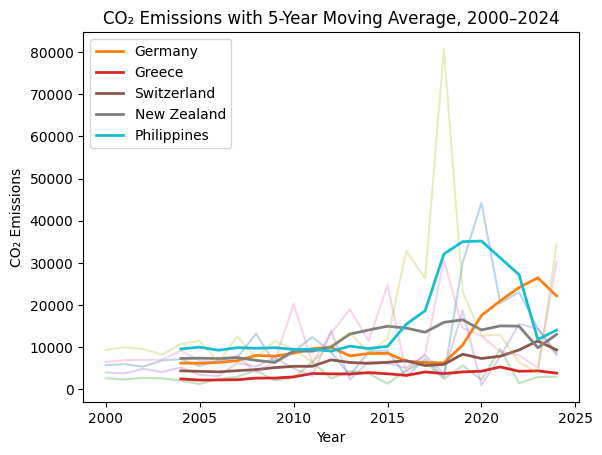

In [212]:
#COMBINEDED
plt.figure()

for country in top5_pop:
    g = df[df["Country"] == country].sort_values("Year")
    plt.plot(
        g["Year"],
        g["CO2_Emissions"],
        alpha=0.3
    )
    
    ma = g["CO2_Emissions"].rolling(window=5).mean()
    
    plt.plot(
        g["Year"],
        ma,
        linewidth=2,
        label=country
    )

plt.title("CO₂ Emissions with 5-Year Moving Average, 2000–2024")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions")
plt.legend()
plt.show()


**GENERAL TRENDS**

The selected countries all showed an increasing trend in C02 emissions, meaning that there's an indirect correlation between time and CO2 growth, likely related to other factors like industry growth, cars, urban development as the years go on.

There were some short period of times where emissions rate decreased, which can be related to country-wide distruptions such as global events, economic recession or ones like what we expericned, COVID-19 (N/A for this dataset but possisibility).

Although there were short-term declines, none were consistent declining to become long-term.

# Part E
PCA Representation

In [213]:
#E.1 - THese are the data rows we are going to be refering to
features = [
    "CO2_Emissions",
    "Methane_Emissions",
    "Nitrous_Emissions",
    "GDP",
    "Population"
]

continent_means = df2020.groupby("Continent")[features].mean()
continent_means

,CO2_Emissions,Methane_Emissions,Nitrous_Emissions,GDP,Population
Continent,,,,,
Africa,16512.669572,1195.076421,783.345290,31799.308580,1.150217e+07
Asia,18366.294404,1575.263331,740.888439,29709.777151,4.660265e+07
Europe,9945.915372,1119.196265,382.081853,29875.135433,6.672596e+07
North America,13890.263758,1747.742745,681.684471,38949.054586,1.128104e+07
Oceania,18112.661094,2240.158097,686.367267,11158.775732,7.057577e+07
South America,6434.510238,681.617460,333.311262,29192.752776,3.232541e+07


In [214]:
#E.2 Feature extraction

#USEING the PCA algorithm - Stanadriae data
#%pip install scikit-learn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(continent_means)
X_scaled

#applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca
X_pca.shape

#EXPLAINING VARIANCE
explained = pca.explained_variance_ratio_ * 100

print(f"PC1 explains {explained[0]:.2f}% of the variance")
print(f"PC2 explains {explained[1]:.2f}% of the variance")
print(f"Total explained variance: {(explained[0] + explained[1]):.2f}%")

PC1 explains 55.08% of the variance
PC2 explains 35.98% of the variance
Total explained variance: 91.06%


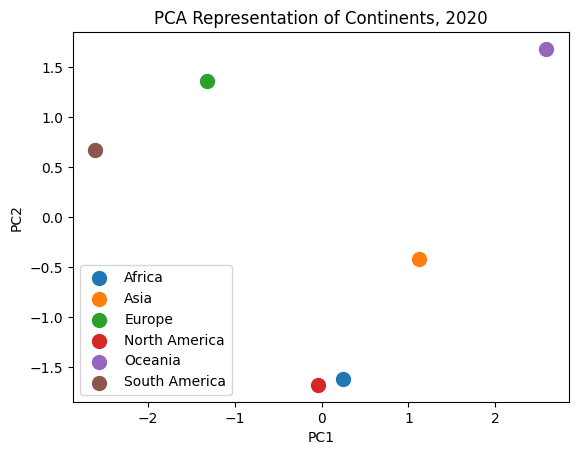

In [215]:
#E.3 Visualization
pca_df = pd.DataFrame(
    X_pca,
    columns=["PC1", "PC2"],
    index=continent_means.index
)
plt.figure()

for continent in pca_df.index:
    plt.scatter(
        pca_df.loc[continent, "PC1"],
        pca_df.loc[continent, "PC2"],
        label=continent,
        s=100
    )

plt.title("PCA Representation of Continents, 2020")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


**INTERPRETATION**

**A)**: PCA is helpful because we had 5 different variables for each continent (CO₂, Methane, Nitrous, GDP, and Population), which makes comparison harder. PCA reduces these 5 variables into just 2 main components while still keeping most of the info (approx 91%).
- PC1 shows the biggest overall difference between continents based on emissions and economic factors.
- PC2 shows the second biggest difference, but in a different direction from PC1.

**B)** Continents that are far apart on the graph are more different in terms of their emissions, GDP, and population. Continents that are closer together are more similar.
From the graph, some continents clearly stand out, meaning their overall emission &  economic patterns are different from others. This shows that continents do not all have the same environmental and economic profiles.


In [192]:
df.to_csv("cleaned_dataset.csv", index=False)
#Cleaned 